### Notebook to check study codelist for trimethoprim and nitrofurantoin data

A notebook to using [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) to compare codelists used by OpenPrescribing measure ["Antibiotic stewardship: prescribing of trimethoprim vs nitrofurantoin"](https://openprescribing.net/measure/trimethoprim/national/england/) against codelists being used in OpenSAFELY study.

- [OpenPrescribing BNF codes](#OPBNF)
- [OpenPrescribing final data](#OPFULL)
- [Study BNF codes](#STUDYBNF)
- [Study final data](#STUDYFULL)
- [OpenPrescribing vs Study](#OPvsSTUDY)

### Imports

In [1]:
#import libraries required for analysis
from ebmdatalab import bq
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#set to display all rows in data
pd.set_option('display.max_rows', None)

<a id=’OPBNF’></a>
### OpenPrescribing BNF codes
Get [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) results for BNF codes as used in OpenPrescribing ["Antibiotic stewardship: prescribing of trimethoprim vs nitrofurantoin"](https://openprescribing.net/measure/trimethoprim/definition/).


In [2]:
#OpenPrescribing BNF codes
sql = '''
SELECT
     CAST(month AS DATE) AS month,
     SUM (CASE WHEN bnf_code IN ("0501080W0AAADAD", "0501080W0AAAEAE", "0501080W0AAAIAI", "0501080W0AAAMAM", "0501080W0AAANAN", "0501080W0BCACAI", "0501080W0BGABAE", "0501080W0BHAAAD", "0501080W0BHABAE")  THEN items ELSE 0 END) as OPtrimethoprim,
     SUM (CASE WHEN bnf_code IN ("0501130R0AAAAAA", "0501130R0AAABAB", "0501130R0AAACAC", "0501130R0AAADAD", "0501130R0AAAEAE", "0501130R0AAAGAG", "0501130R0AAAJAJ", "0501130R0AAAMAM", "0501130R0AAANAN", "0501130R0AAATAT", "0501130R0AAAUAU", "0501130R0AAAVAV", "0501130R0AABDBD", "0501130R0AABEBE", "0501130R0AABNBN", "0501130R0AABSBS", "0501130R0AACGCG", "0501130R0BBAAAD", "0501130R0BBABAE", "0501130R0BBACAC", "0501130R0BCAAAA", "0501130R0BCABAB", "0501130R0BGAAAG", "0501130R0BHAAAE", "0501130R0BHABAD")  THEN items ELSE 0 END) as OPnitrofurantoin
 FROM hscic.normalised_prescribing
 WHERE month >= '2019-01-01'
 GROUP BY month
 ORDER BY month'''

OP_DF = bq.cached_read(sql, csv_path=os.path.join('..','data','OPbnfcodes.csv'))
OP_DF

,month,OPtrimethoprim,OPnitrofurantoin
0,2019-01-01,152426,360236
1,2019-02-01,133176,314762
2,2019-03-01,141992,343045
3,2019-04-01,131158,322109
4,2019-05-01,138745,345123
5,2019-06-01,130105,333050
6,2019-07-01,134785,355237
7,2019-08-01,139567,373254
8,2019-09-01,135085,361110
9,2019-10-01,141477,381483


<a id=’OPFULL’></a>
### OpenPrescribing data

Using dataframe from above, calculate:
1. total trimethoprim and nitrofurantoin data  
2. trimethoprim % of total of trimethoprim and nitrofurantoin.

In [19]:
#Create new column - Sum of trimethoprim and nitrofurantoin columns
OP_DF['OPtrim+OPnitro'] = OP_DF['OPtrimethoprim'] + OP_DF['OPnitrofurantoin']

#Create new column - Trimethoprim as a % of trimethoprim + nitrofurantoin
OP_DF['OPtrim_percent'] = OP_DF['OPtrimethoprim'] / OP_DF['OPtrim+OPnitro'] * 100

OP_DF

,month,OPtrimethoprim,OPnitrofurantoin,OPtrim+OPnitro,OPtrim_percent
0,2019-01-01,152426,360236,512662,29.732260
1,2019-02-01,133176,314762,447938,29.730900
2,2019-03-01,141992,343045,485037,29.274468
3,2019-04-01,131158,322109,453267,28.936146
4,2019-05-01,138745,345123,483868,28.674143
5,2019-06-01,130105,333050,463155,28.091028
6,2019-07-01,134785,355237,490022,27.505908
7,2019-08-01,139567,373254,512821,27.215539
8,2019-09-01,135085,361110,496195,27.224176
9,2019-10-01,141477,381483,522960,27.053121


<a id=’STUDYBNF’></a>
### Study BNF codes
Get [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) results for BNF codes as used in the study definition:
- [Trimethoprim codelist inc co-trimoxazole](https://www.opencodelists.org/codelist/user/yayang/codes_ab_type_trimethoprimcsv/1653d5a9/)
- [Nitrofurantoin codelist](https://www.opencodelists.org/codelist/user/yayang/codes_ab_type_nitrofurantoincsv/56b72f70/)

In [4]:
#Study BNF codes
sql = '''
SELECT
     CAST(month AS DATE) AS month,
     SUM (CASE WHEN bnf_code IN ("0501080W0AAAPAP", "0501080W0AAAAAA", "0501080W0BHABAE", "0501080W0AAAEAE", "0501080W0BHAAAD", "0501080W0AAAIAI", "0501080W0BCAAAD", "0501080W0BCACAI", "0501080W0AAADAD", "0501080W0BCABAE", "0501080W0BGABAE", "0501080W0AAANAN", "0501080W0AAAMAM", "0501080W0AAAQAQ", "0501080W0BCADAA", "0501080W0BGAAAD") THEN items ELSE 0 END) as Studytrimethoprim,
     SUM (CASE WHEN bnf_code IN ("0501080D0AAABAB", "0501080D0BGACAJ", "0501080D0AAATAT", "0501080D0AAAHAH", "0501080D0BGAAAH", "0501080D0AAAJAJ", "0501080D0BGAHAB", "0501080D0BGAFAC", "0501080D0AAAEAE", "0501080D0AAACAC", "0501080D0BGAEAE")  THEN items ELSE 0 END) as Studycotrimoxazole,
     SUM (CASE WHEN bnf_code IN ("0501130R0BHAAAE", "0501130R0BBABAE", "0501130R0BGAAAG", "0501130R0AACGCG", "0501130R0AAATAT", "0501130R0AABJBJ", "0501130R0AABABA", "0501130R0AAAWAW", "0501130R0BHABAD", "0501130R0AAACAC", "0501130R0AABYBY", "0501130R0AAAUAU", "0501130R0AAAEAE", "0501130R0AABVBV", "0501130R0AABTBT", "0501130R0BCABAB", "0501130R0AAAZAZ", "0501130R0AABUBU", "0501130R0AAALAL", "0501130R0AABCBC", "0501130R0BBACAC", "0501130R0BDABAE", "0501130R0AAARAR", "0501130R0AABGBG", "0501130R0AAAPAP", "0501130R0AAAQAQ", "0501130R0AABWBW", "0501130R0AAAXAX", "0501130R0AACECE", "0501130R0AABSBS", "0501130R0AABDBD", "0501130R0AAADAD", "0501130R0AACJCJ", "0501130R0AABKBK", "0501130R0AABEBE", "0501130R0AAAMAM", "0501130R0AACDCD", "0501130R0AAAAAA", "0501130R0AABLBL", "0501130R0AABIBI", "0501130R0AABXBX", "0501130R0BCAAAA", "0501130R0AAASAS", "0501130R0AABNBN", "0501130R0BBAAAD", "0501130R0AAAVAV", "0501130R0AABRBR", "0501130R0AACICI", "0501130R0AABPBP", "0501130R0AAABAB", "0501130R0AAAGAG", "0501130R0BDAAAD", "0501130R0AAAJAJ", "0501130R0AABBBB", "0501130R0AAANAN", "0501130R0AABQBQ")  THEN items ELSE 0 END) as Studynitrofurantoin
 FROM hscic.normalised_prescribing
 WHERE month >= '2019-01-01'
 GROUP BY month
 ORDER BY month'''

STUDY_DF = bq.cached_read(sql, csv_path=os.path.join('..','data','STUDYbnfcodes.csv'))
STUDY_DF

,month,Studytrimethoprim,Studycotrimoxazole,Studynitrofurantoin
0,2019-01-01,152426,14570,360236
1,2019-02-01,133176,13259,314762
2,2019-03-01,141992,14131,343045
3,2019-04-01,131158,14140,322109
4,2019-05-01,138745,14989,345123
5,2019-06-01,130105,14163,333050
6,2019-07-01,134785,14697,355237
7,2019-08-01,139567,15519,373254
8,2019-09-01,135085,14648,361110
9,2019-10-01,141477,15795,381483


<a id=’STUDYFULL’></a>
### Study data

Using dataframe from cell above, calculate:
1. sum trimethoprim + co-trimoxazole data
2. sum trimethoprim + nitrofurantoin data
3. sum trimethoprim + co-trimoxazole + nitrofurantoin data
4. trimethoprim % of total of trimethoprim and nitrofurantoin.
5. trimethoprim + co-trimoxazole % of total of trimethoprim, co-trimoxazole and nitrofurantoin.

In [18]:
#Sum all trimethoprim containing
STUDY_DF['StudyTrim+Cotrim'] = STUDY_DF['Studytrimethoprim'] + STUDY_DF['Studycotrimoxazole']

#Create new column - Sum of trimethoprim and nitrofurantoin columns
STUDY_DF['StudyTrim+Nitro'] = STUDY_DF['Studytrimethoprim'] + STUDY_DF['Studynitrofurantoin']

#Create new column - Sum trimethoprim, co-trimoxazole and nitrofurantoin columns
STUDY_DF['StudyTrim+Cotrim+Nitro'] = STUDY_DF['Studytrimethoprim'] + STUDY_DF['Studycotrimoxazole'] + STUDY_DF['Studynitrofurantoin']

#Create new column - Trimethoprim as a % of trimethoprim + nitrofurantoin
STUDY_DF['Studytrim_percent'] = STUDY_DF['Studytrimethoprim'] / STUDY_DF['StudyTrim+Nitro'] * 100

#Create new column - Trimethoprim + co-trimoxazole as a % of trimethoprim + co-trimoxazole + nitrofurantoin
STUDY_DF['Studytrim+cotrim_percent'] = STUDY_DF['StudyTrim+Cotrim'] / STUDY_DF['StudyTrim+Cotrim+Nitro'] * 100

STUDY_DF

,month,Studytrimethoprim,Studycotrimoxazole,Studynitrofurantoin,StudyTrim+Cotrim,StudyTrim+Nitro,StudyTrim+Cotrim+Nitro,Studytrim_percent,Studytrim+cotrim_percent
0,2019-01-01,152426,14570,360236,166996,512662,527232,29.732260,31.674102
1,2019-02-01,133176,13259,314762,146435,447938,461197,29.730900,31.751074
2,2019-03-01,141992,14131,343045,156123,485037,499168,29.274468,31.276644
3,2019-04-01,131158,14140,322109,145298,453267,467407,28.936146,31.085970
4,2019-05-01,138745,14989,345123,153734,483868,498857,28.674143,30.817248
5,2019-06-01,130105,14163,333050,144268,463155,477318,28.091028,30.224714
6,2019-07-01,134785,14697,355237,149482,490022,504719,27.505908,29.616876
7,2019-08-01,139567,15519,373254,155086,512821,528340,27.215539,29.353447
8,2019-09-01,135085,14648,361110,149733,496195,510843,27.224176,29.310962
9,2019-10-01,141477,15795,381483,157272,522960,538755,27.053121,29.191748


<a id=’OPvsSTUDY’></a>
### OpenPrescribing vs Study

Side by side comparison of % for OpenPrescribing vs Study

In [20]:
#Get OpenPrescribing data for final comparison
FINAL_DF = OP_DF[['month', 'OPtrim_percent']]

#Merge in Study data
FINAL_DF = pd.merge(FINAL_DF, STUDY_DF[['month', 'Studytrim_percent', 'Studytrim+cotrim_percent']] ,on='month',how='left')

FINAL_DF

,month,OPtrim_percent,Studytrim_percent,Studytrim+cotrim_percent
0,2019-01-01,29.732260,29.732260,31.674102
1,2019-02-01,29.730900,29.730900,31.751074
2,2019-03-01,29.274468,29.274468,31.276644
3,2019-04-01,28.936146,28.936146,31.085970
4,2019-05-01,28.674143,28.674143,30.817248
5,2019-06-01,28.091028,28.091028,30.224714
6,2019-07-01,27.505908,27.505908,29.616876
7,2019-08-01,27.215539,27.215539,29.353447
8,2019-09-01,27.224176,27.224176,29.310962
9,2019-10-01,27.053121,27.053121,29.191748


### Chart comparison

Generate charts from data in above cell for comparison
1. OpenPrescribing % of trimethoprim of total of trimethoprim + nitrofurantion

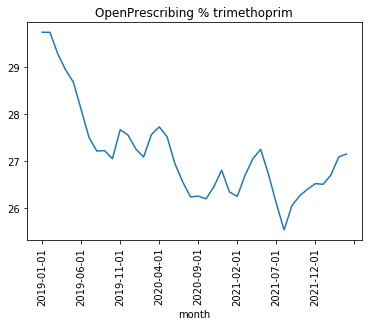

In [21]:
ax = FINAL_DF.groupby(["month"])['OPtrim_percent'].sum().plot(kind='line', title="OpenPrescribing % trimethoprim")
plt.xticks(rotation=90);
plt.ylabel('% of total');

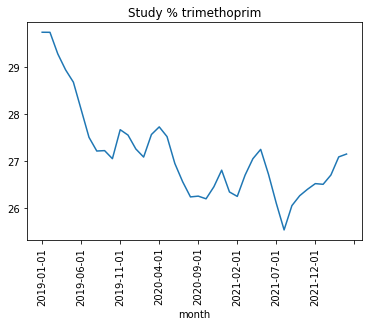

In [22]:
ax = FINAL_DF.groupby(["month"])['Studytrim_percent'].sum().plot(kind='line', title="Study % trimethoprim")
plt.xticks(rotation=90);
plt.ylabel('% of total');

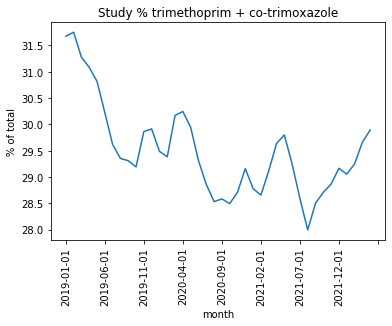

In [24]:
ax = FINAL_DF.groupby(["month"])['Studytrim+cotrim_percent'].sum().plot(kind='line', title="Study % trimethoprim + co-trimoxazole")
plt.xticks(rotation=90);
plt.ylabel('% of total');